# ⚙️ Adaptive Gradient Methods — Adagrad, RMSProp, and Adam

In this notebook, we explore **adaptive optimizers**, which adjust learning rates **per parameter dimension**.  
These methods automatically scale updates based on gradient history, allowing for:

- Faster convergence  
- Better performance on sparse features  
- Reduced need for manual learning rate tuning  

---

## 🧭 Covered in this notebook
1. Motivation for adaptive learning rates  
2. Adagrad: Accumulating squared gradients  
3. RMSProp: Exponential moving average  
4. Adam: Momentum + RMSProp  
5. Visual and comparative analysis  

---

### 🧩 References
- Duchi, J., Hazan, E., & Singer, Y. (2011). *Adaptive Subgradient Methods for Online Learning and Stochastic Optimization*. JMLR.  
- Tieleman, T., & Hinton, G. (2012). *Lecture 6.5 — RMSProp*, Coursera.  
- Kingma, D., & Ba, J. (2015). *Adam: A Method for Stochastic Optimization*. ICLR.  
- Goodfellow, Bengio, Courville (2016). *Deep Learning*, Chapter 8.

---

## 💡 Why Adaptive Learning Rates?

In previous notebooks, we used a **single global learning rate** \( \eta \).  
However, not all parameters learn equally fast:

- Some gradients are large → should take **smaller steps**
- Some are small → should take **larger steps**

Adaptive optimizers rescale gradients by their historical magnitudes, creating **parameter-wise learning rates** that evolve over time.

---

Imagine walking across a landscape where each direction has a different slope — adaptive methods automatically choose the optimal stride for each direction.

---

### Step-1: Imports and Environment Setup

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

### Step-2: Define the Sample Function and its Gradient

In [3]:
# Non-isotropic function for visualization
def f(x, y):
    return 0.5 * (x**2 + 10 * y**2)

def grad_f(x, y):
    return np.array([x, 10*y])

### Step-3: Helper Function for Plotting Utility

In [4]:
def plot_surface_contour():
    x = np.linspace(-3, 3, 300)
    y = np.linspace(-3, 3, 300)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    plt.figure(figsize=(8,7))
    plt.contour(X, Y, Z, levels=30, cmap='viridis')
    plt.title("Loss Surface: 0.5(x² + 10y²)")
    plt.xlabel("x")
    plt.ylabel("y")
    return X, Y, Z

### Step-4: Adagrad Implemtaion

In [8]:
def adagrad(grad, start, lr=0.8, eps=1e-8, n_iter=30):
    x = start
    G = np.zeros_like(x)
    path = [x]
    for _ in range(n_iter):
        g = grad(*x)
        G += g**2
        x = x - lr * g / (np.sqrt(G) + eps)
        path.append(x)
    return np.array(path)

### Step-5: RMSProp Implementation

In [5]:
def rmsprop(grad, start, lr=0.1, beta=0.9, eps=1e-8, n_iter=30):
    x = start
    Eg = np.zeros_like(x)
    path = [x]
    for _ in range(n_iter):
        g = grad(*x)
        Eg = beta * Eg + (1 - beta) * g**2
        x = x - lr * g / (np.sqrt(Eg) + eps)
        path.append(x)
    return np.array(path)

### Step-6: Adam Implementation

In [6]:
def adam(grad, start, lr=0.1, beta1=0.9, beta2=0.999, eps=1e-8, n_iter=30):
    x = start
    m = np.zeros_like(x)
    v = np.zeros_like(x)
    path = [x]
    for t in range(1, n_iter + 1):
        g = grad(*x)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * (g ** 2)
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        x = x - lr * m_hat / (np.sqrt(v_hat) + eps)
        path.append(x)
    return np.array(path)

### Step-6: Optimizer Comparison

In [9]:
start = np.array([2.5, 2.5])

adagrad_path = adagrad(grad_f, start)
rmsprop_path = rmsprop(grad_f, start)
adam_path = adam(grad_f, start)

### Step-7: Visual Comparison Analysing Trajectories

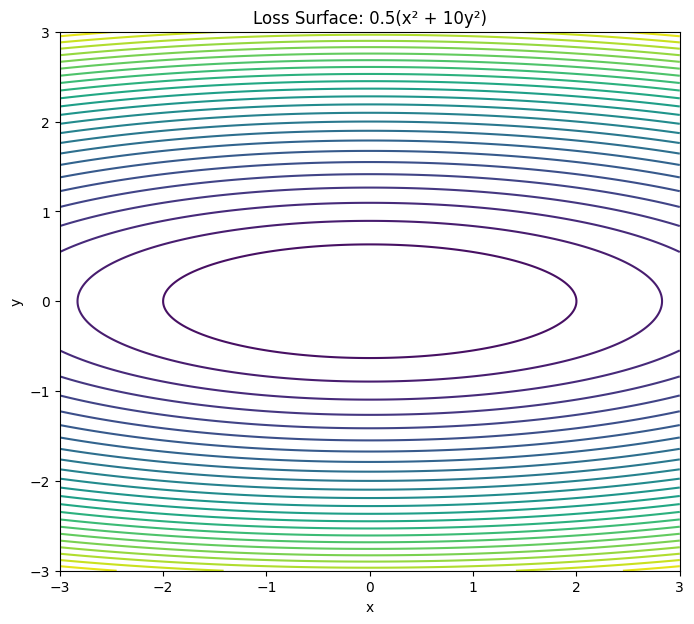

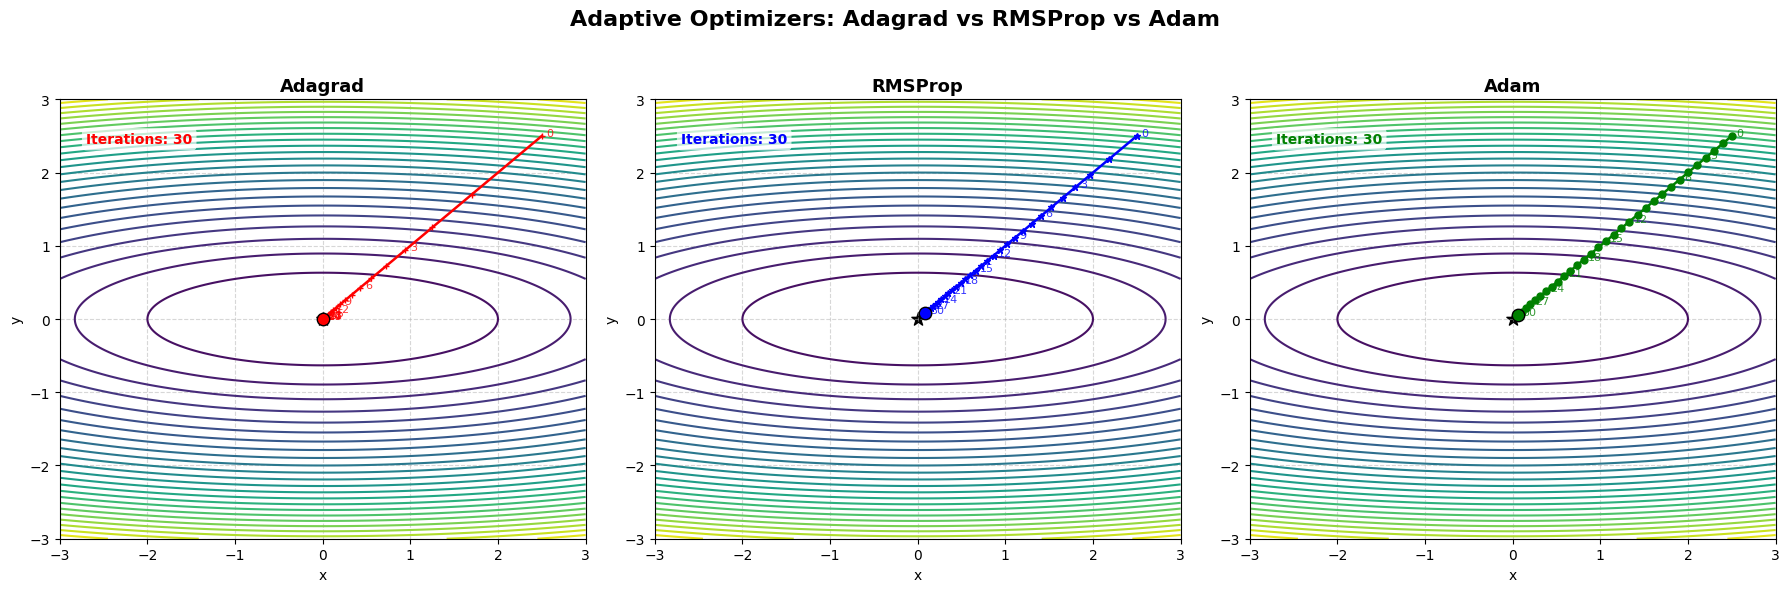

In [15]:
# Generate the surface
X, Y, Z = plot_surface_contour()

# Define optimizers and visuals
optimizers = ['Adagrad', 'RMSProp', 'Adam']
paths = [adagrad_path, rmsprop_path, adam_path]
colors = ['r', 'b', 'g']
markers = ['+', '*', 'o']

# Create 1x3 subplot layout
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, opt, path, c, m in zip(axes, optimizers, paths, colors, markers):
    # Draw contour of the loss surface
    ax.contour(X, Y, Z, levels=25, cmap='viridis')

    # Plot optimizer path
    ax.plot(path[:, 0], path[:, 1], color=c, marker=m, markersize=5, linewidth=1.8, label=opt)

    # Mark global minimum
    ax.scatter(0, 0, c='black', marker='*', s=100)

    # Highlight final convergence point
    ax.scatter(path[-1, 0], path[-1, 1], edgecolors='k', facecolors=c, s=80, zorder=5)

    # Annotate number of iterations
    ax.text(
        0.05, 0.9,
        f"Iterations: {len(path) - 1}",
        transform=ax.transAxes,
        fontsize=10,
        color=c,
        weight='bold',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3')
    )

    # Optional: label a few steps to show progress
    for i, (x, y) in enumerate(path):
        if i % max(1, len(path)//8) == 0:
            ax.text(x + 0.05, y, str(i), fontsize=8, color=c, alpha=0.8)

    # Titles, labels, grid
    ax.set_title(opt, fontsize=13, weight='bold')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid(True, linestyle='--', alpha=0.5)

# Global title and layout adjustment
plt.suptitle("Adaptive Optimizers: Adagrad vs RMSProp vs Adam", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## 🔍 Interpretation of Trajectories

| Optimizer | Behavior | Observation |
|------------|-----------|-------------|
| **Adagrad** | Starts fast, slows down quickly | Step sizes shrink rapidly as gradient history accumulates |
| **RMSProp** | Smooth convergence | Exponentially forgets old gradients, avoids Adagrad’s vanishing step size |
| **Adam** | Smooth, accelerated, adaptive | Combines **momentum** and **adaptive scaling**, producing the most stable path |

---

**Adagrad** accumulates all past gradient magnitudes:
$$
G_t = \sum_{i=1}^{t} g_i^2
$$
causing the learning rate to shrink monotonically.

**RMSProp** introduces exponential decay to maintain adaptability:
$$
E[g^2]_t = \beta E[g^2]_{t-1} + (1-\beta)g_t^2
$$

**Adam** blends **RMSProp** and **Momentum**:
$$
m_t = \beta_1 m_{t-1} + (1-\beta_1)g_t, \quad
v_t = \beta_2 v_{t-1} + (1-\beta_2)g_t^2
$$
$$
\theta_{t+1} = \theta_t - \eta \frac{m_t / (1-\beta_1^t)}{\sqrt{v_t / (1-\beta_2^t)} + \epsilon}
$$
---

### Step-8: Learning Rate Scaling

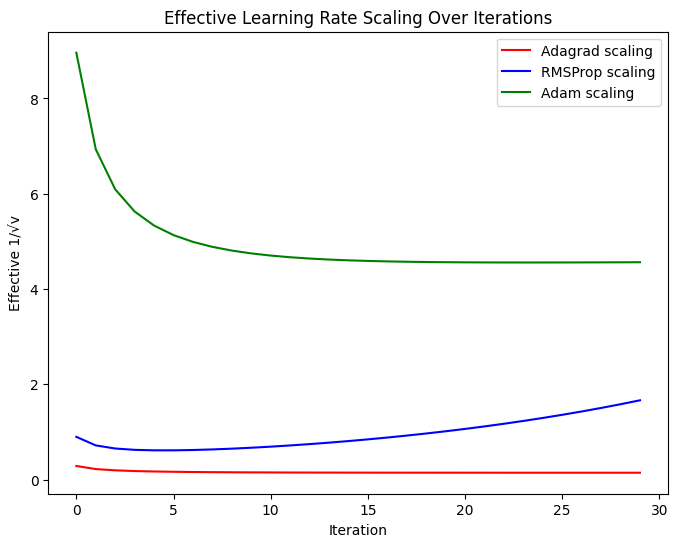

In [13]:
# Visualize how adaptive scaling behaves for one dimension
iterations = 30
g_history = []
G_adagrad = []
E_rmsprop = []
V_adam = []

x = np.array([2.0, 1.5])
m = np.zeros_like(x)
v = np.zeros_like(x)
G = np.zeros_like(x)
Eg = np.zeros_like(x)

for t in range(1, iterations + 1):
    g = grad_f(*x)
    g_history.append(np.linalg.norm(g))
    G += g**2
    Eg = 0.9 * Eg + 0.1 * g**2
    v = 0.999 * v + 0.001 * g**2
    G_adagrad.append(np.mean(1 / (np.sqrt(G) + 1e-8)))
    E_rmsprop.append(np.mean(1 / (np.sqrt(Eg) + 1e-8)))
    V_adam.append(np.mean(1 / (np.sqrt(v) + 1e-8)))
    x = x - 0.1 * g

plt.figure(figsize=(8,6))
plt.plot(G_adagrad, 'r', label='Adagrad scaling')
plt.plot(E_rmsprop, 'b', label='RMSProp scaling')
plt.plot(V_adam, 'g', label='Adam scaling')
plt.title("Effective Learning Rate Scaling Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Effective 1/√v")
plt.legend()
plt.show()

## 🧠 Insights from Scaling Graph

- **Adagrad** aggressively shrinks learning rates → good for sparse features but can stall.  
- **RMSProp** maintains adaptability by forgetting older gradients.  
- **Adam** stabilizes updates using momentum and bias correction — offering both speed and robustness.

---

### 💬 In Practice

| Dataset Type | Recommended Optimizer |
|---------------|-----------------------|
| Sparse gradients (e.g., NLP) | Adagrad |
| Non-stationary objectives | RMSProp |
| Deep neural networks | Adam (default) |

---

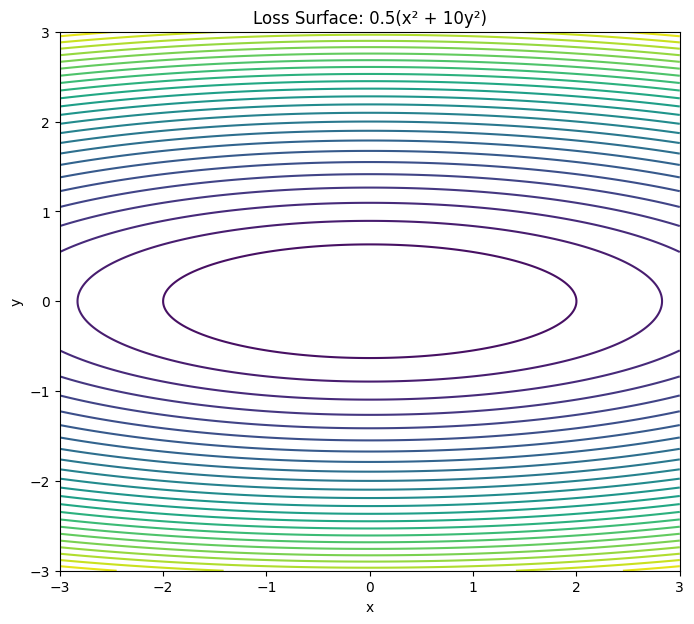

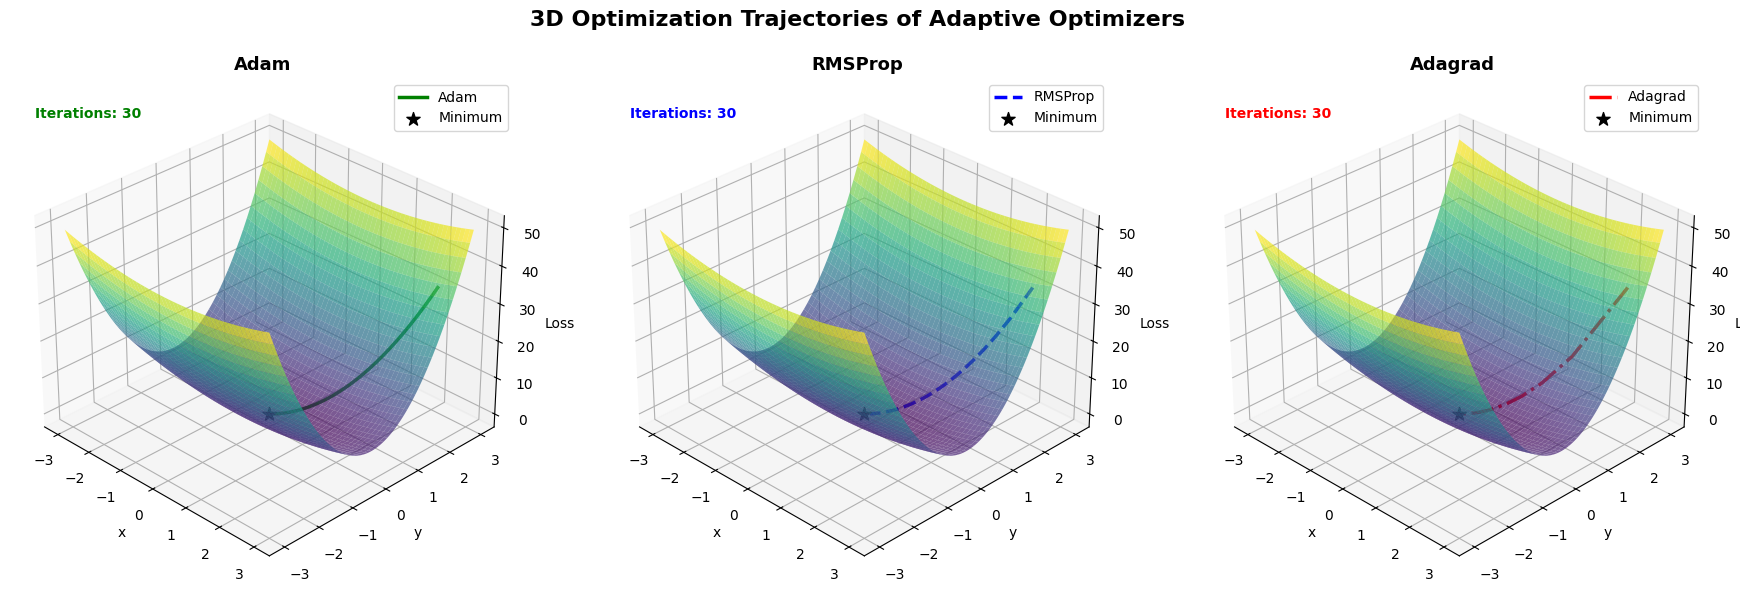

In [17]:
# Generate surface (assuming you have this function)
X, Y, Z = plot_surface_contour()

optimizers = ['Adam', 'RMSProp', 'Adagrad']
paths = [adam_path, rmsprop_path, adagrad_path]
colors = ['g', 'b', 'r']
linestyles = ['-', '--', '-.']

# Create 1×3 figure layout
fig = plt.figure(figsize=(18, 6))

for i, (opt, path, c, ls) in enumerate(zip(optimizers, paths, colors, linestyles), 1):
    ax = fig.add_subplot(1, 3, i, projection='3d')
    
    # Plot 3D surface
    ax.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.7, linewidth=0, antialiased=True)
    
    # Plot optimization path
    ax.plot(
        path[:, 0],
        path[:, 1],
        f(path[:, 0], path[:, 1]),
        color=c,
        linestyle=ls,
        linewidth=2.5,
        label=opt
    )
    
    # Mark the global minimum
    ax.scatter(0, 0, 0, c='black', marker='*', s=100, label='Minimum')
    
    # Annotate iteration count
    ax.text2D(
        0.05, 0.92,
        f"Iterations: {len(path)-1}",
        transform=ax.transAxes,
        fontsize=10,
        color=c,
        weight='bold',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.3')
    )
    
    # Set consistent labels
    ax.set_title(f"{opt}", fontsize=13, weight='bold')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("Loss")
    ax.view_init(elev=30, azim=-45)  # adjust for a clear angle
    ax.legend()

# Global title
fig.suptitle("3D Optimization Trajectories of Adaptive Optimizers", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# ✅ Summary

| Optimizer | Key Idea | Strengths | Weaknesses |
|------------|-----------|------------|-------------|
| **Adagrad** | Accumulates squared gradients | Great for sparse gradients | Step size decays too quickly |
| **RMSProp** | Exponential moving average | Stable in non-stationary settings | Requires tuning β |
| **Adam** | Momentum + RMSProp | Fast convergence, robust | May overfit if β₁ too high |

---

### 🧭 Takeaway

- Adagrad → memory of *all past gradients*  
- RMSProp → *forgetful memory* with exponential decay  
- Adam → adds *inertia (momentum)* and *bias correction*  

---

### 🔮 Next Notebook
> **SOTA Optimizers — AdamW, Ranger, LION**  
We’ll explore *decoupled weight decay*, *lookahead mechanisms*, and *non-momentum adaptive methods*.

---

> “Adaptive optimizers are not just parameter updates — they’re learning rate learning algorithms.”